<a href="https://colab.research.google.com/github/solobala/MDS27/blob/main/MDS27_DZ81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание "Случайные величины и вероятности".

###Задание 1

В магазин привезли устройства с 3-х разных предприятий.

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта.

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [ ]:
alfa = [0.2,0.3,0.5] # Соотношение продукции разных предприятий
beta = [0.1, 0.05, 0.2] # Соотношение продукции высшего сорта у разных предприятий
p = 0
for i in range(3):
  p += alfa[i] * beta[i]
print(f'Вероятность того, что случайно купленная новая продукция окажется высшего сорта: {100*p}%')  

вероятность того, что случайно купленная новая продукция окажется высшего сорта: 13.5%


### Задание 2
Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

Пусть W - множество всех элементарных исходов при подбрасываний  уравновешенных монет 1,2,3.

Для каждой из монет возможны 2 элементарных исхода: 0 - "орел", 1 - "решка".Тогда множество всех элементарныx исходов - матрица вида:
[[0,0,0],[0,0,1],[0,1,0], [1,0,0],[1,0,1], [1,1,0],[0,1,1], [1,1,1]]. 

Все исходы равновероятны, в сумме вероятность = 1. Тогда p=[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]

События A1,A2, A3 - подмножества W. 

*   A1 =[[0,0,0],[0,0,1], [1,1,0], [1,1,1]]. Тогда p(A1)=0,125*4=0.5
*   A2 = [[0,0,0], [1,0,0], [0,1,1], [1,1,1]]. Тогда p(A2)=0,125*4=0.5
*   A3 = [[0,0,0],[0,1,0], [1,0,1],  [1,1,1]]. Тогда p(A3)=0,125*4=0.5


Если рассматривать пары событий A1-A2, A1-A3 и A2-A3, то вероятность второго в каждой паре события P(B|A) - условная (условие - то, что 1-е в паре событие произошло) - и считается  как p(A∩B)/p(A) =(0.5/4*2)/0.5=0.5 

P(A) + P(B|A) = 0.5+0.5 =1 - для каждой пары A1-A2, A1-A3 и A2-A3

Если бы A1, A2, A3 были бы независимыми в генеральной совокупности W, то их суммарная вероятность была бы <=1. 

Однако это не так:   p(A1) + p(A2)+ p(A3) = 1.5, и элементарные исходы C[[0,0,0],  [1,1,1]] входят в каждое из A1, A2,A2

### Задание 3
Изучите 3 распределения из библиотеки scipy: Нормальное, Экспоненциальное, Стьюдента. Используя функцию плотности распредления (pdf), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения.

Дополнительная информация тут.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import t

In [65]:
def get_draw(x ,label,func, *kwargs):
  """
  Вспомогательная ф-я построения графиков распределения функций 
  norm.pdf, expon.pdf, t.pdf при различных значениях параметров
  """
  fig = plt.figure(figsize=[20,2])
  colors =['red', 'blue', 'green', 'orange', 'violet']
  for i in range(1,6):
    ax = fig.add_subplot(1, 5, i)
    if func == norm.pdf:
      ax.set_title(f'loc={locs[i-1]}, scale={scales[i-1]}')
      ax.plot(x, func(x,loc=locs[i-1], scale=scales[i-1]), 'r-', lw=5, alpha=0.6, label=label, color=colors[i-1])
    elif func == expon.pdf and lambdas:
       ax.set_title(f'lambda={lambdas[i-1]}')
       scale=1/lambdas[i-1]
       ax.plot(x, expon.pdf(x, scale=scale), 'r-', lw=5, alpha=0.6, label=label, color=colors[i-1])  
    elif func == expon.pdf and lambdas is None:
      ax.set_title(f'loc={locs[i-1]}, scale={scales[i-1]}')
      ax.plot(x, expon.pdf(x, scale=scale), 'r-', lw=5, alpha=0.6, label=label, color=colors[i-1]) 
    elif func == t.pdf:
      x = np.linspace(t.ppf(0.01, df[i-1]), t.ppf(0.99, df[i-1]), 100)
      ax.set_title(f'df={df[i-1]}, loc={locs[i-1]}, scale={scales[i-1]}')
      ax.plot(x, t.pdf(x, df[i-1], loc=locs[i-1], scale=scales[i-1]), 'r-', lw=5, alpha=0.6, label=label, color=colors[i-1])  

#### Нормальное распределение

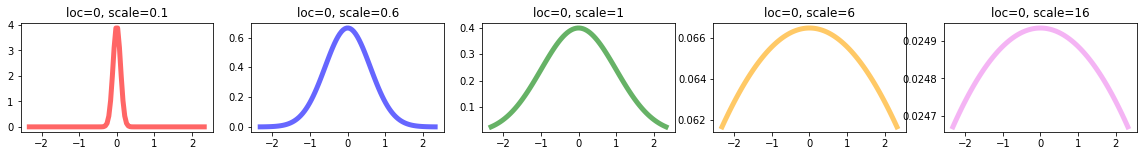

In [37]:
# График зависит от двух параметров:loc(мат. ожидание, по умолчанию 0) 
# и scale (стандартное отклонение, по умолчанию 1)
# Зафиксируем loc

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
locs = [0,0,0,0,0]
scales = [0.1, 0.6, 1, 6, 16]
label = 'norm pdf' 
get_draw(x ,label,norm.pdf, locs ,scales )

##### Вывод: scale растягивает/сжимает график плотности распределения вдоль оси Х

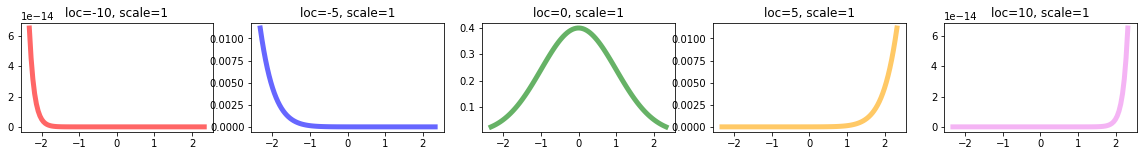

In [38]:
# теперь зафиксируем scale
# fig = plt.figure(figsize=[20,2])
locs = [-10, -5, 0, 5, 10]
scales = [1,1,1,1,1]
get_draw(x ,label, norm.pdf, locs ,scales)

##### Вывод: loc смещает график вправо(loc>0) или влево (loc <0)

#### Экспоненциальное распределение

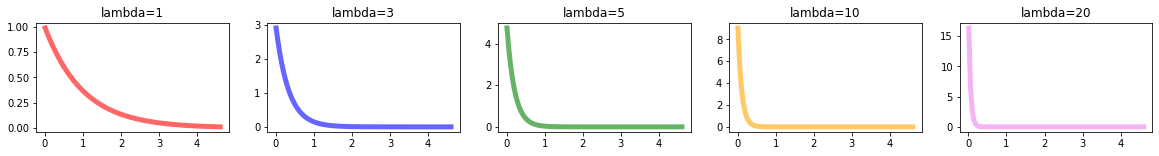

In [40]:
# исследуем зависимость от интенсивности lambda, которая связана с мат. ожиданием scale: scale=1/lambda

x = np.linspace(expon.ppf(0.01),  expon.ppf(0.99), 100)
label = 'expon.pdf'
lambdas = [1,3,5, 10, 20]
get_draw(x ,label, expon.pdf, lambdas)


Вывод: c увеличением lambda увеличивается кривизна (уменьшается радиус кривизны)

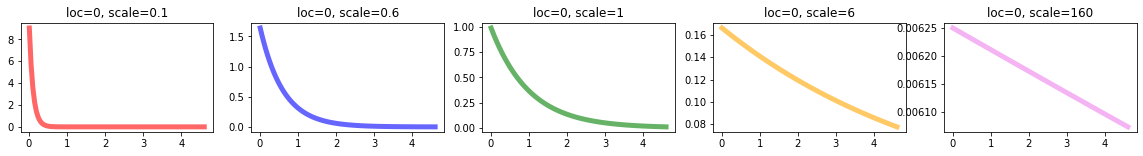

In [49]:
# График зависит от двух параметров:loc и scale
# Зафиксируем loc
locs = [0,0,0,0,0]
scales = [0.1, 0.6, 1, 6, 160]
lambdas=None
get_draw(x ,label, expon.pdf, lambdas, locs ,scales)


Вывод: С увеличением Scale уменьшается кривизна графика (увеличивается радиус кривизны), что совершенно логично, учитывая, что scale=1/lambda

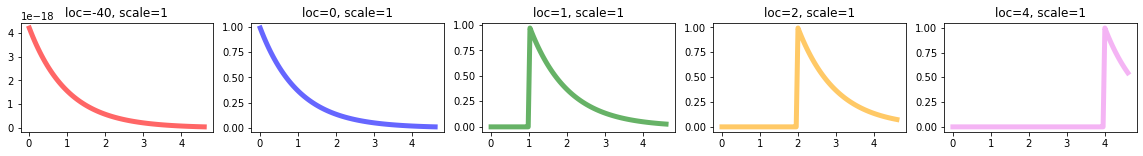

In [51]:
# теперь зафиксируем scale
locs = [-40, 0, 1, 2, 4]
scales = [1,1,1,1,1]
get_draw(x ,label, expon.pdf, lambdas, locs ,scales)


##### Вывод: loc смещает график вправо(loc>0) или влево (loc <0)

#### Распределение стьюдента

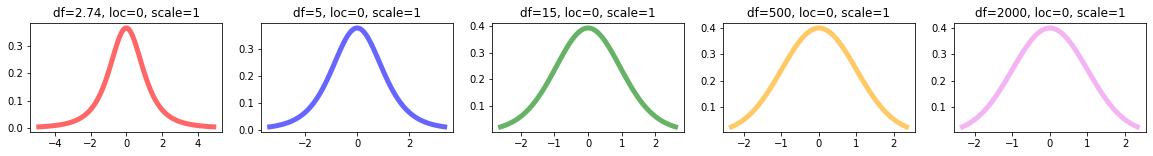

In [68]:
# График зависит от трех параметров: df (параметр степеней свободы), loc и scale
label = 't pdf'
# Зафиксируем loc  и scale, меняем df
locs = [0,0,0,0,0]
scales = [1,1,1,1,1]
lambdas = None
df = [2.74,5, 15, 500, 2000]

get_draw(x ,label, t.pdf, lambdas, locs, scales, df)


##### Вывод: незначительно увеличивается ширина графика (уменьшается радиус кривизны)

<Figure size 1440x144 with 0 Axes>

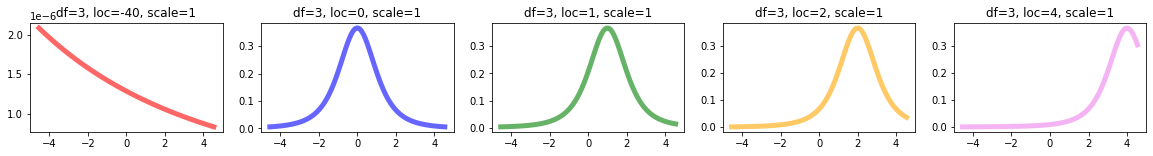

In [72]:
# теперь зафиксируем scale и df
fig = plt.figure(figsize=[20,2])
locs = [-40, 0, 1, 2, 4]
scales = [1,1,1,1,1]
df = [3,3,3,3,3]
get_draw(x ,label, t.pdf, lambdas, locs, scales, df)


##### Вывод: loc смещает график вправо(loc>0) или влево (loc <0)

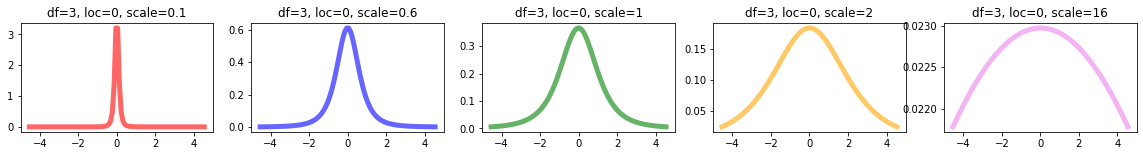

In [71]:
# Зафиксируем loc  и df

locs = [0,0,0,0,0]
scales = [0.1, 0.6, 1, 2, 16]
df = [3, 3, 3, 3, 3]
get_draw(x ,label, t.pdf, lambdas, locs, scales, df)

##### Вывод: scale значительно меняет ширину графика